In [1]:
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Get checkpoints based on grad norm

In [3]:
gradnorm_df = pd.read_csv("../wandb_gradnorm.csv")
gradnorm_df.shape

(668, 7)

In [4]:
gradnorm_df.columns

Index(['train/global_step',
       'offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - _step',
       'offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - _step__MIN',
       'offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - _step__MAX',
       'offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - train/grad_norm',
       'offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - train/grad_norm__MIN',
       'offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - train/grad_norm__MAX'],
      dtype='object')

In [5]:
safety_llama_checkpoints_thresh045 = (
    gradnorm_df[
        gradnorm_df[
            "offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - train/grad_norm"
        ]
        >= 0.45
    ]["train/global_step"]
    .unique()
    .tolist()
)

In [6]:
# number of checkpoints (excluding the base model before finetuning and the final checkpoint)
len(safety_llama_checkpoints_thresh045)

201

## Plots

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot(df, x, y, title, xlabel, ylabel=None, y_limits=None, font_size=16):
    plt.figure()
    sns.lineplot(data=df, x=x, y=y)
    plt.title(title, fontsize=font_size)
    plt.xlabel(xlabel, fontsize=font_size)
    plt.ylabel("", fontsize=font_size)

    # show the max value of x in xticks
    max_x = df[x].max()
    plt.xticks([i for i in range(0, max_x + 1, 100)] + [max_x], fontsize=font_size)
    if y_limits is None:
        plt.yticks(np.arange(0, df[y].max() + 0.1, 0.2), fontsize=font_size)
    else:
        plt.yticks(np.arange(y_limits[0], y_limits[1] + 0.1, 0.2), fontsize=font_size)
    plt.xlim(0, df[x].max())
    if y_limits is None:
        plt.ylim(0, df[y].max() + 0.1)
    else:
        plt.ylim(y_limits)
    plt.grid()
    plt.show()


def plot_df(filepath, x, y, title, xlabel, ylabel=None, y_limits=None, font_size=16):
    df = pd.read_csv(filepath)
    plot(df, x, y, title, xlabel, ylabel, y_limits, font_size)

### Train loss

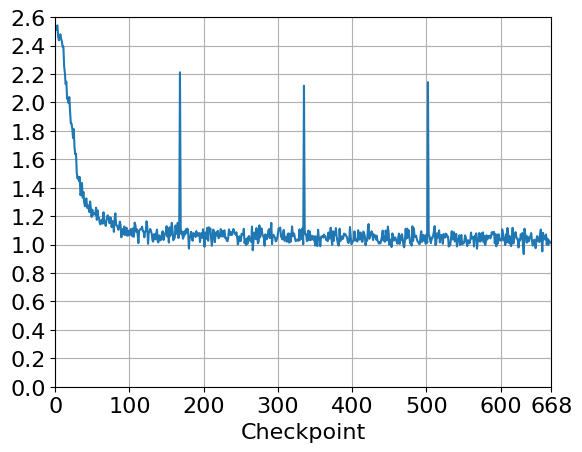

In [8]:
plot_df(
    filepath="../wandb_train_loss.csv",
    x="train/global_step",
    y="offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - train/loss",
    title="",
    xlabel="Checkpoint",
    y_limits=(0, 2.6),
)

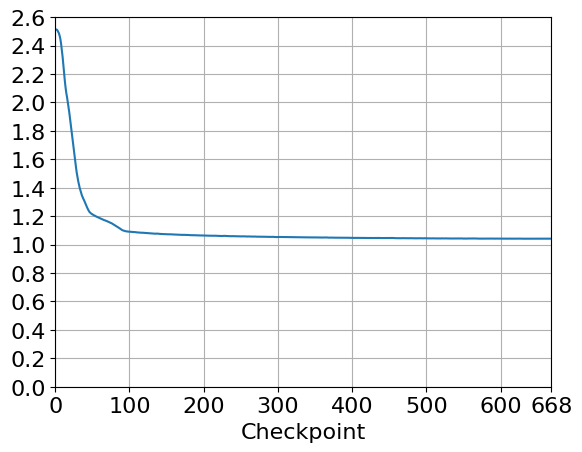

In [9]:
plot_df(
    filepath="../wandb_eval_loss.csv",
    x="train/global_step",
    y="offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - eval/loss",
    title="",
    xlabel="Checkpoint",
    y_limits=(0, 2.6),
)

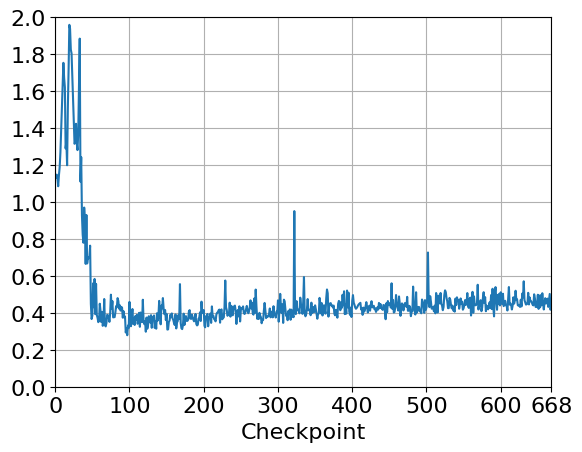

In [10]:
plot_df(
    filepath="../wandb_gradnorm.csv",
    x="train/global_step",
    y="offline-run-safety-tuned-Llama-3-8B-Instruct-2000 - train/grad_norm",
    title="",
    xlabel="Checkpoint",
    y_limits=(0, 2),
)